## Alex's Project


## Pt 1
 - unpack the data and establish what we're working with
 - develop a plan for creating the baseline model
 - prepare data for baseline model
 - create baseline model
 - test baseline model
 

### Unpack the data and establish what we're working with

In [1]:
#Data analysis imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#ignore pairplot and graph warnings
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from scipy import stats
from sklearn.dummy import DummyRegressor

In [2]:
!ls data

column_names.md
kc_house_data.csv
kc_house_data_cleaned.csv


In [3]:
#Read cleaned housing data into Pandas data frame
df = pd.read_csv("data/kc_house_data_cleaned.csv")

In [4]:
#investigate first 5 rows
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated,sqft_basement2
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,0.0,1955,1955.0,98178,47.5112,-122.257,1340,5650,False,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,True,400
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,0.0,1933,1933.0,98028,47.7379,-122.233,2720,8062,False,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,910.0,1965,1965.0,98136,47.5208,-122.393,1360,5000,False,910
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,0.0,1987,1987.0,98074,47.6168,-122.045,1800,7503,False,0


In [5]:
#creating age column based on yr_built and yr_renovated
#how to treat houses that were never renovated?
df['age_at_sale'] = (df['date'].str[-4:].astype(int) - df['yr_built']).astype(int)

df['age_renovation_at_sale'] = (df['date'].str[-4:].astype(int) - df['yr_renovated']).astype(int)

In [6]:
age_columns = ['date', 'yr_built', 'age_at_sale', 'age_renovation_at_sale']
df[age_columns].head(20)

,date,yr_built,age_at_sale,age_renovation_at_sale
0,10/13/2014,1955,59,59
1,12/9/2014,1951,63,23
2,2/25/2015,1933,82,82
3,12/9/2014,1965,49,49
4,2/18/2015,1987,28,28
5,5/12/2014,2001,13,13
6,6/27/2014,1995,19,19
7,1/15/2015,1963,52,52
8,4/15/2015,1960,55,55
9,3/12/2015,2003,12,12


In [7]:
#Look at column data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      21597 non-null  int64  
 1   date                    21597 non-null  object 
 2   price                   21597 non-null  float64
 3   bedrooms                21597 non-null  int64  
 4   bathrooms               21597 non-null  float64
 5   sqft_living             21597 non-null  int64  
 6   sqft_lot                21597 non-null  int64  
 7   floors                  21597 non-null  float64
 8   waterfront              21597 non-null  object 
 9   view                    21597 non-null  object 
 10  condition               21597 non-null  object 
 11  grade                   21597 non-null  object 
 12  sqft_above              21597 non-null  int64  
 13  sqft_basement           21597 non-null  object 
 14  yr_built                21597 non-null

In [8]:
#count non-unqiue entries in the ID column
#represents homes that appear multiple times in our data
df['id'].duplicated().value_counts()

False    21420
True       177
Name: id, dtype: int64

In [9]:
#Finding list of duplicate ID values
df_dupes = df
df_dupes["dup_id"] = df_dupes['id'].duplicated()
df_dupes[df_dupes["dup_id"]==True]['id']

94       6021501535
314      4139480200
325      7520000520
346      3969300030
372      2231500030
            ...    
20165    7853400250
20597    2724049222
20654    8564860270
20764    6300000226
21565    7853420110
Name: id, Length: 177, dtype: int64

In [10]:
duplicate_id_values = list(df_dupes[df_dupes["dup_id"]==True]['id'].values)

In [11]:
#Ivestigating a few duplicate values
df[df['id']==duplicate_id_values[2]]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated,sqft_basement2,age_at_sale,age_renovation_at_sale,dup_id
324,7520000520,9/5/2014,232000.0,2,1.0,1240,12092,1.0,NO,NONE,...,98146,47.4957,-122.352,1820,7460,True,280,92,30,False
325,7520000520,3/11/2015,240500.0,2,1.0,1240,12092,1.0,NO,NONE,...,98146,47.4957,-122.352,1820,7460,True,280,93,31,True


In [12]:
df[df['id']==duplicate_id_values[5]]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated,sqft_basement2,age_at_sale,age_renovation_at_sale,dup_id
717,8820903380,7/28/2014,452000.0,6,2.25,2660,13579,2.0,NO,NONE,...,98125,47.7142,-122.286,1120,8242,True,0,77,24,False
718,8820903380,1/2/2015,730000.0,6,2.25,2660,13579,2.0,NO,NONE,...,98125,47.7142,-122.286,1120,8242,True,0,78,25,True


Concluding that house ids appear multiple times because homes can be sold multiple times

In [13]:
#looking at measures of central tendancy in the data
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement2,age_at_sale,age_renovation_at_sale
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.371811,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,1972.945131,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,291.725008,43.323286,41.377830
std,2.876736e+09,3.673681e+05,0.904096,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,28.945393,53.513072,0.138552,0.140724,685.230472,27274.441950,442.667800,29.377285,28.950873
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,-1.000000,-1.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,1954.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,0.000000,18.000000,16.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,1977.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,0.000000,40.000000,37.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,1999.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,560.000000,63.000000,61.000000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,4820.000000,115.000000,115.000000


### Develop a plan for creating the baseline model

#### Investigate correlations of numeric columns and price
Numeric columns offer the simplest starting point for linear regression. Investigating correlation of these columns.

In [14]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'was_renovated',
       'sqft_basement2', 'age_at_sale', 'age_renovation_at_sale', 'dup_id'],
      dtype='object')

In [15]:
#Investigate correlations of valid numeric columns and price
valid_numeric_columns_df = df[["price","bedrooms","bathrooms","sqft_living","sqft_lot","sqft_above", "sqft_living15", "sqft_lot15", "sqft_basement2", "age_at_sale", 'age_renovation_at_sale']]
valid_numeric_columns_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'sqft_above', 'sqft_living15', 'sqft_lot15', 'sqft_basement2',
       'age_at_sale', 'age_renovation_at_sale'],
      dtype='object')

In [16]:
abs(valid_numeric_columns_df.corrwith(valid_numeric_columns_df['price'])).sort_values(ascending=False)

price                     1.000000
sqft_living               0.701917
sqft_above                0.605368
sqft_living15             0.585241
bathrooms                 0.525906
sqft_basement2            0.323799
bedrooms                  0.315954
age_renovation_at_sale    0.097462
sqft_lot                  0.089876
sqft_lot15                0.082845
age_at_sale               0.053890
dtype: float64

In [17]:
((abs(valid_numeric_columns_df.corr())) >= .70)[:1]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_living15,sqft_lot15,sqft_basement2,age_at_sale,age_renovation_at_sale
price,True,False,False,True,False,False,False,False,False,False,False


 `'sqft_living'` is a candidate for further investigation based on the absolute value of its correlations with `'price'` being above 0.70



#### Validate assumptions for simple regression 
Validate that our candidates for dependant and independant variables `'sqft_living'` and  `'price'` pass assumptions for linear regression analysis.

  ##### Before running model 
 - Linearity
 ##### After running model
 - Normality of model residals (after running model)
 - Homoscedasticity (after running model)

#### Validate linearity
The relatioinship between `'sqft_living'` and  `'price'` passes our visual linearity test. There appear to be some outliers to investigate in future models that could improve the results.

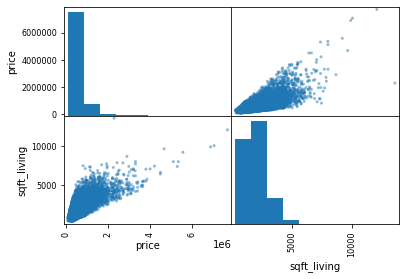

In [18]:
pd.plotting.scatter_matrix(df[['price','sqft_living']]);
plt.show()

#### Run simple regression model on `'sqft_living'` and  `'price'`

In [19]:
from statsmodels.formula.api import ols
simple_model = ols('price ~ sqft_living',df).fit()
simple_model_summary = simple_model.summary()
simple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Wed, 22 Jun 2022   Prob (F-statistic):               0.00
Time:                        09:28:00   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

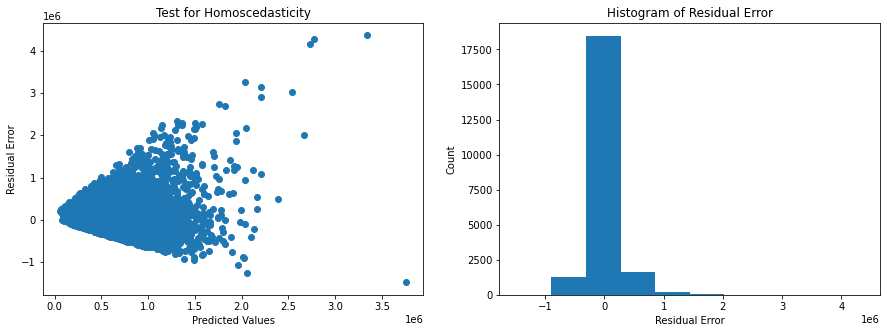

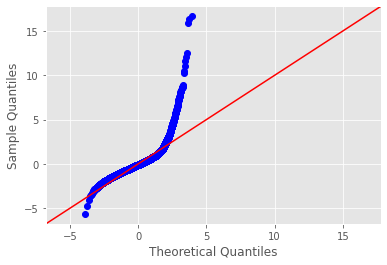

In [20]:
import scipy.stats as stats
resid = simple_model.resid

fig, ax = plt.subplots(1,2,figsize=(15, 5))
ax[0].scatter(x=simple_model.fittedvalues,y=resid)
ax[0].set_xlabel("Predicted Values")
ax[0].set_ylabel("Residual Error")
ax[0].set_title(label="Test for Homoscedasticity")


ax[1].hist(resid)
ax[1].set_xlabel("Residual Error")
ax[1].set_ylabel("Count")
ax[1].set_title(label="Histogram of Residual Error");

import statsmodels.api as sm
plt.style.use('ggplot')
fig = sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True)

### Analysis of simple regression model

In [21]:
print(f'R-squared {round(simple_model.rsquared,2)}')
print(f'P-Value {simple_model.f_pvalue}')
print(f'Price standard error {round(simple_model.bse,0)[0]}')
print(f'sqft_living coef {round(simple_model.params[1])}')

R-squared 0.49
P-Value 0.0
Price standard error 4410.0
sqft_living coef 281.0


We're confident that we've described a statistically significant relationship between`'sqft_living'` and  `'price'` but our model is pretty biased and doesn't do a very good job predicting home price.

Our tests of validity indicated that there is heteroscedasticity and our errors have a significant rightward skew. Our predictions seem to break down at higher `'sqft_living'` suggesting that we have some outliers to deal with to improve our model.

## Pt 2
 - Improvements to simple model

#### Validate assumptions for improvements to simple regression

 ##### Before running model 
 - Linearity
 - Outliers
 - Normality of variables (not-required) 
 ##### After running model
 - Normality of model residals (after running model)
 - Homoscedasticity (after running model)

#### Validate outliers


Looking at `'sqft_living'` because there's seems to be a lack of linearity between `'sqft_living'` and  `'price'` when `'sqft_living'` is very high

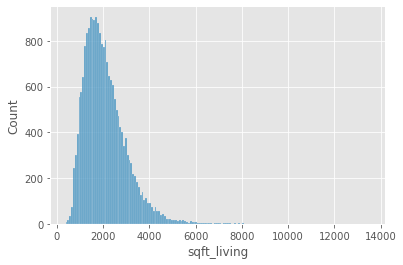

In [22]:
sns.histplot(df['sqft_living']);

In [23]:
df['sqft_living'].describe()

count    21597.000000
mean      2080.321850
std        918.106125
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

### Model 2: Remove upper outliers in `'sqft_living'`

`'sqft_living'` is normally distributed but there is a right-skew giving us some outliers.
The rule for a high outlier is that if any data point in a dataset is more than Q3 - 1.5xIQR, it's a high outlier. We will subset our data to only look at data that falls under 1.5xIQR

In [24]:
#Find our IQR
sqft_living_iqr = df['sqft_living'].quantile(.75)-df['sqft_living'].quantile(.25)
#Find our Q3
sqft_living_Q3 = df['sqft_living'].quantile(.75)
#Multiply IQR by 1.5 to establish outlier cutoff
sqft_living_upperoutlier_cutoff = (sqft_living_iqr *3) + sqft_living_Q3
print(f' sqft_living_iqr IQR: {sqft_living_iqr}')
print(f' sqft_living_iqr upper outlier cutoff: {sqft_living_upperoutlier_cutoff}')

 sqft_living_iqr IQR: 1120.0
 sqft_living_iqr upper outlier cutoff: 5910.0


In [25]:
#Create a new df with sqft_living upper outliers removed
df_outliers_removed = df[df['sqft_living'] <= sqft_living_upperoutlier_cutoff]
print(f'We removed {len(df["sqft_living"])-len(df_outliers_removed["sqft_living"])} outliers from sqft_living')

We removed 74 outliers from sqft_living


In [26]:
refined_model_1 = ols('price ~ sqft_living',df_outliers_removed).fit()
refined_model_1_summary = refined_model_1.summary()
refined_model_1_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                 1.837e+04
Date:                Wed, 22 Jun 2022   Prob (F-statistic):               0.00
Time:                        09:28:01   Log-Likelihood:            -2.9782e+05
No. Observations:               21523   AIC:                         5.956e+05
Df Residuals:                   21521   BIC:                         5.957e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -9633.6564   4345.922     -2.217      0.027   -1.82e+04   -1115.326
sqft_living   263.1498      1.942    135.538      0.000     259.344     266.955
==============================================================================
Omnibus:                    11403.148   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           156454.040
Skew:                           2.238   Prob(JB):                         0.00
Kurtosis:                      15.426   Cond. No.                     5.77e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Model 2: Analysis
- We failed to improve our model
- Next, we will try to remove lower outliers in `'sqft_living'`

In [27]:
print(f'Simple R-squared {round(simple_model.rsquared,2)}')
print(f'Simple P-Value {simple_model.f_pvalue}')
print(f'Simple Price standard error {round(simple_model.bse,0)[0]}')
print(f'Simple sqft_living coef {round(simple_model.params[1])}')

print(f'refined_model_1 R-squared {round(refined_model_1.rsquared,2)}')
print(f'refined_model_1 P-Value {refined_model_1.f_pvalue}')
print(f'refined_model_1 Price standard error {round(refined_model_1.bse,0)[0]}')
print(f'refined_model_1 sqft_living coef {round(refined_model_1.params[1])}')


Simple R-squared 0.49
Simple P-Value 0.0
Simple Price standard error 4410.0
Simple sqft_living coef 281.0
refined_model_1 R-squared 0.46
refined_model_1 P-Value 0.0
refined_model_1 Price standard error 4346.0
refined_model_1 sqft_living coef 263.0


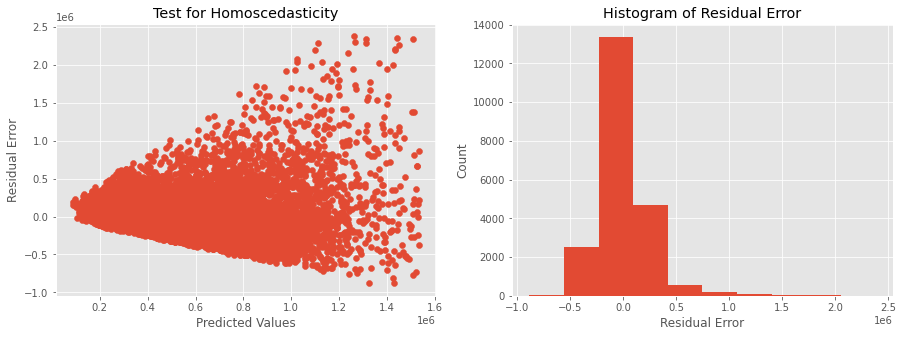

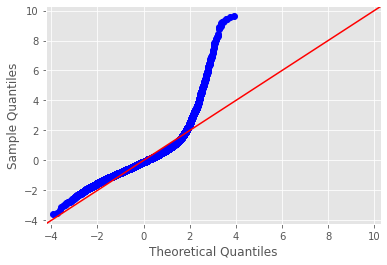

In [28]:
resid_refined_model_1 = refined_model_1.resid

fig, ax = plt.subplots(1,2,figsize=(15, 5))
ax[0].scatter(x=refined_model_1.fittedvalues,y=resid_refined_model_1)
ax[0].set_xlabel("Predicted Values")
ax[0].set_ylabel("Residual Error")
ax[0].set_title(label="Test for Homoscedasticity")


ax[1].hist(resid_refined_model_1)
ax[1].set_xlabel("Residual Error")
ax[1].set_ylabel("Count")
ax[1].set_title(label="Histogram of Residual Error");

import statsmodels.api as sm
plt.style.use('ggplot')
fig = sm.graphics.qqplot(resid_refined_model_1, dist=stats.norm, line='45', fit=True)

### Model 3: Remove lower outliers in `'sqft_living'`

In [29]:
#Find our IQR
sqft_living_iqr = df['sqft_living'].quantile(.75)-df['sqft_living'].quantile(.25)
#Find our Q3
sqft_living_Q3 = df['sqft_living'].quantile(.75)
#Multiply IQR by 1.5 to establish outlier cutoff
sqft_living_upperoutlier_cutoff = (sqft_living_iqr *1.5) + sqft_living_Q3
#Remove lower outliers beneath 750 sqft_living
sqft_living_loweroutlier_cutoff = 750
print(f' sqft_living_iqr IQR: {sqft_living_iqr}')
print(f' sqft_living_iqr upper outlier cutoff: {sqft_living_upperoutlier_cutoff}')
print(f' sqft_living_iqr lower outlier cutoff: {sqft_living_loweroutlier_cutoff}')

 sqft_living_iqr IQR: 1120.0
 sqft_living_iqr upper outlier cutoff: 4230.0
 sqft_living_iqr lower outlier cutoff: 750


In [30]:
#Create a new df with sqft_living lower & upper outliers removed
df_outliers_removed = df[(df['sqft_living'] <= sqft_living_upperoutlier_cutoff) & (df['sqft_living'] >= sqft_living_loweroutlier_cutoff)]
print(f'We removed {len(df["sqft_living"])-len(df_outliers_removed["sqft_living"])} outliers from sqft_living')

We removed 851 outliers from sqft_living


In [31]:
#Re-run our new model
refined_model_2 = ols('price ~ sqft_living',df_outliers_removed).fit()
refined_model_2_summary = refined_model_2.summary()
refined_model_2_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                 1.326e+04
Date:                Wed, 22 Jun 2022   Prob (F-statistic):               0.00
Time:                        09:28:02   Log-Likelihood:            -2.8482e+05
No. Observations:               20746   AIC:                         5.697e+05
Df Residuals:                   20744   BIC:                         5.697e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.094e+04   4381.935      9.343      0.000    3.23e+04    4.95e+04
sqft_living   234.1656      2.033    115.166      0.000     230.180     238.151
==============================================================================
Omnibus:                     9334.925   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            86290.718
Skew:                           1.935   Prob(JB):                         0.00
Kurtosis:                      12.211   Cond. No.                     6.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Model 3: Analysis
- We failed to improve our model
- Next, we will try to add additional variables

In [32]:
print(f'Simple R-squared {round(simple_model.rsquared,2)}')
print(f'Simple P-Value {simple_model.f_pvalue}')
print(f'Simple Price standard error {round(simple_model.bse,0)[0]}')
print(f'Simple sqft_living coef {round(simple_model.params[1])}')

print(f'refined_model_1 R-squared {round(refined_model_1.rsquared,2)}')
print(f'refined_model_1 P-Value {refined_model_1.f_pvalue}')
print(f'refined_model_1 Price standard error {round(refined_model_1.bse,0)[0]}')
print(f'refined_model_1 sqft_living coef {round(refined_model_1.params[1])}')

print(f'refined_model_2 R-squared {round(refined_model_2.rsquared,2)}')
print(f'refined_model_2 P-Value {refined_model_2.f_pvalue}')
print(f'refined_model_2 Price standard error {round(refined_model_2.bse,0)[0]}')
print(f'refined_model_2 sqft_living coef {round(refined_model_2.params[1])}')

Simple R-squared 0.49
Simple P-Value 0.0
Simple Price standard error 4410.0
Simple sqft_living coef 281.0
refined_model_1 R-squared 0.46
refined_model_1 P-Value 0.0
refined_model_1 Price standard error 4346.0
refined_model_1 sqft_living coef 263.0
refined_model_2 R-squared 0.39
refined_model_2 P-Value 0.0
refined_model_2 Price standard error 4382.0
refined_model_2 sqft_living coef 234.0


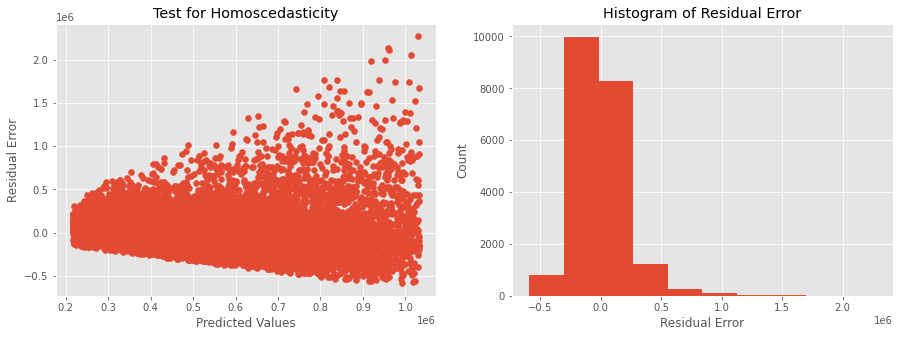

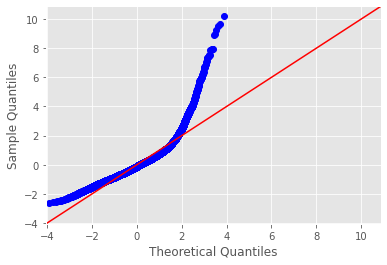

In [33]:
resid_refined_model_2 = refined_model_2.resid

fig, ax = plt.subplots(1,2,figsize=(15, 5))
ax[0].scatter(x=refined_model_2.fittedvalues,y=resid_refined_model_2)
ax[0].set_xlabel("Predicted Values")
ax[0].set_ylabel("Residual Error")
ax[0].set_title(label="Test for Homoscedasticity")


ax[1].hist(resid_refined_model_2)
ax[1].set_xlabel("Residual Error")
ax[1].set_ylabel("Count")
ax[1].set_title(label="Histogram of Residual Error");

import statsmodels.api as sm
plt.style.use('ggplot')
fig = sm.graphics.qqplot(resid_refined_model_2, dist=stats.norm, line='45', fit=True)

### Model 4: Multi-variable linear regressions 1


In [34]:
#Create a list of our numeric columns
df_numeric = valid_numeric_columns_df
df_numeric.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_living15,sqft_lot15,sqft_basement2,age_at_sale,age_renovation_at_sale
0,221900.0,3,1.00,1180,5650,1180,1340,5650,0,59,59
1,538000.0,3,2.25,2570,7242,2170,1690,7639,400,63,23
2,180000.0,2,1.00,770,10000,770,2720,8062,0,82,82
3,604000.0,4,3.00,1960,5000,1050,1360,5000,910,49,49
4,510000.0,3,2.00,1680,8080,1680,1800,7503,0,28,28


In [35]:
#Test up train-test split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df.drop(columns=['price'])
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#Subset to numeric columns
numeric_columns = list(df_numeric.columns.drop(['price']))
X_train_numeric = X_train[numeric_columns]
X_test_numeric = X_test[numeric_columns]
#Fit model
lr = LinearRegression()
lr.fit(X_train_numeric,y_train)

LinearRegression()

In [36]:
X_train_numeric

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_living15,sqft_lot15,sqft_basement2,age_at_sale,age_renovation_at_sale
6243,4,2.00,1440,4855,1440,1300,4080,0,42,42
8986,3,1.75,1430,9857,1140,1310,9880,290,35,35
9419,4,2.75,3120,5000,3120,3200,5000,0,4,4
10155,4,2.50,2060,6958,1220,1760,7350,840,41,41
10436,3,2.00,2500,4080,1680,1550,3060,820,92,92
...,...,...,...,...,...,...,...,...,...,...
11964,3,2.50,2230,5800,2230,2230,6088,0,10,10
21575,4,2.75,2770,3852,2770,1810,5641,0,0,0
5390,4,1.50,1530,9000,1530,1520,8500,0,38,38
860,1,0.75,380,15000,380,1170,15000,0,51,51


In [37]:
#DummyRegressor scores for train and test sets
dummy_lr = DummyRegressor()
dummy_lr.fit(X_train, y_train)
print(dummy_lr.score(X_train, y_train))

print(dummy_lr.score(X_test, y_test))

0.0
-0.00028681792529150485


In [38]:
#Run multi-variable model using numeric columns
endog = df_numeric['price']
exog = sm.add_constant(df_numeric.drop(columns=['price']))

multi_model_1 = sm.OLS(endog, exog).fit()
multi_model_1_summary = multi_model_1.summary()
multi_model_1_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     3151.
Date:                Wed, 22 Jun 2022   Prob (F-statistic):               0.00
Time:                        09:28:03   Log-Likelihood:            -2.9833e+05
No. Observations:               21597   AIC:                         5.967e+05
Df Residuals:                   21587   BIC:                         5.968e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -2.383e+05   9543.604    -24.975      0.000   -2.57e+05    -2.2e+05
bedrooms               -7.392e+04   2317.025    -31.905      0.000   -7.85e+04   -6.94e+04
bathrooms               8.477e+04   3744.722     22.638      0.000    7.74e+04    9.21e+04
sqft_living              168.5738      2.539     66.395      0.000     163.597     173.550
sqft_lot                  -0.0108      0.057     -0.188      0.851      -0.123       0.101
sqft_above                94.3894      2.307     40.911      0.000      89.867      98.912
sqft_living15             87.2479      3.793     23.004      0.000      79.814      94.682
sqft_lot15                -0.7805      0.087     -8.930      0.000      -0.952      -0.609
sqft_basement2            74.1844      2.793     26.556      0.000      68.709      79.660
age_at_sale             4004.9899    150.246     26.656      0.000    3710.497    4299.483
age_renovation_at_sale  -708.8551    154.117     -4.599      0.000   -1010.935    -406.775
==============================================================================
Omnibus:                    14924.263   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           621603.984
Skew:                           2.810   Prob(JB):                         0.00
Kurtosis:                      28.674   Cond. No.                     1.26e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.49e-19. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [39]:
#Try scaling coeficients
#Import standard scaler
from sklearn.preprocessing import StandardScaler

#Scale our exogenous variables
ss = StandardScaler()
ss.fit(df_numeric.drop(columns=['price']))
X_scaled = ss.transform(df_numeric.drop(columns=['price']))

#Create dataframe with columns titles
X_scaled_df = pd.DataFrame(X_scaled)
X_scaled_df.columns = list(df_numeric.drop(columns=['price']).columns)

In [40]:
X_scaled_df

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_living15,sqft_lot15,sqft_basement2,age_at_sale,age_renovation_at_sale
0,-0.411261,-1.451073,-0.980652,-0.228182,-0.735251,-0.943676,-0.260627,-0.659031,0.533646,0.608706
1,-0.411261,0.174486,0.533369,-0.189739,0.460776,-0.432887,-0.187700,0.244602,0.669809,-0.634808
2,-1.517363,-1.451073,-1.427234,-0.123139,-1.230575,1.070292,-0.172190,-0.659031,1.316582,1.403174
3,0.694841,1.149821,-0.131057,-0.243878,-0.892305,-0.914488,-0.284459,1.396734,0.193239,0.263286
4,-0.411261,-0.150626,-0.436040,-0.169503,-0.131197,-0.272353,-0.192686,-0.659031,-0.521615,-0.462098
...,...,...,...,...,...,...,...,...,...,...
21592,-0.411261,0.499597,-0.599424,-0.337306,-0.312413,-0.666390,-0.412457,-0.659031,-1.304551,-1.256566
21593,0.694841,0.499597,0.250171,-0.224246,0.629911,-0.228571,-0.203796,-0.659031,-1.440714,-1.394734
21594,-1.517363,-1.776184,-1.154928,-0.332018,-0.928548,-1.410683,-0.394198,-0.659031,-1.304551,-1.256566
21595,-0.411261,0.499597,-0.523178,-0.306952,-0.227845,-0.841518,-0.420597,-0.659031,-1.100307,-1.049313


In [41]:
df_numeric

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_living15,sqft_lot15,sqft_basement2,age_at_sale,age_renovation_at_sale
0,221900.0,3,1.00,1180,5650,1180,1340,5650,0,59,59
1,538000.0,3,2.25,2570,7242,2170,1690,7639,400,63,23
2,180000.0,2,1.00,770,10000,770,2720,8062,0,82,82
3,604000.0,4,3.00,1960,5000,1050,1360,5000,910,49,49
4,510000.0,3,2.00,1680,8080,1680,1800,7503,0,28,28
...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,1530,1530,1509,0,5,5
21593,400000.0,4,2.50,2310,5813,2310,1830,7200,0,1,1
21594,402101.0,2,0.75,1020,1350,1020,1020,2007,0,5,5
21595,400000.0,3,2.50,1600,2388,1600,1410,1287,0,11,11


In [42]:
#Run multi-variable model
endog = df_numeric['price']
exog = sm.add_constant(X_scaled_df)

multi_model_scaled = sm.OLS(endog, exog).fit()
multi_model_scaled = multi_model_scaled.summary()
multi_model_scaled

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     3141.
Date:                Wed, 22 Jun 2022   Prob (F-statistic):               0.00
Time:                        09:28:03   Log-Likelihood:            -2.9835e+05
No. Observations:               21597   AIC:                         5.967e+05
Df Residuals:                   21587   BIC:                         5.968e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   5.403e+05   1645.226    328.403      0.000    5.37e+05    5.44e+05
bedrooms               -6.917e+04   2911.636    -23.756      0.000   -7.49e+04   -6.35e+04
bathrooms               6.615e+04   2999.201     22.055      0.000    6.03e+04     7.2e+04
sqft_living             4.073e+17   3.52e+17      1.156      0.248   -2.83e+17     1.1e+18
sqft_lot                -351.1056   2374.914     -0.148      0.882   -5006.113    4303.902
sqft_above             -3.672e+17   3.18e+17     -1.156      0.248    -9.9e+17    2.55e+17
sqft_living15           5.981e+04   2601.182     22.993      0.000    5.47e+04    6.49e+04
sqft_lot15             -2.128e+04   2385.894     -8.921      0.000    -2.6e+04   -1.66e+04
sqft_basement2         -1.964e+17    1.7e+17     -1.156      0.248   -5.29e+17    1.36e+17
age_at_sale             1.178e+05   4418.747     26.654      0.000    1.09e+05    1.26e+05
age_renovation_at_sale -2.056e+04   4465.600     -4.603      0.000   -2.93e+04   -1.18e+04
==============================================================================
Omnibus:                    15654.142   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           712772.393
Skew:                           2.995   Prob(JB):                         0.00
Kurtosis:                      30.499   Cond. No.                     6.35e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.3e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Model 4: Analysis
- We improved upon our simple model
- Our new model's variance is low
- sqft_lot is not statistically significant
- Next, we to remove co-linear variables

In [43]:
#Print results compared to our simple model
print(f'Simple R2 {round(simple_model.rsquared,2)}')
print(f'multi_model_1 Train R2 {round(lr.score(X_train_numeric, y_train),2)}')
print(f'multi_model_1 Test R2 {round(lr.score(X_test_numeric, y_test),2)}')

Simple R2 0.49
multi_model_1 Train R2 0.57
multi_model_1 Test R2 0.56


### Model 4: Multi-variable linear regressions 2

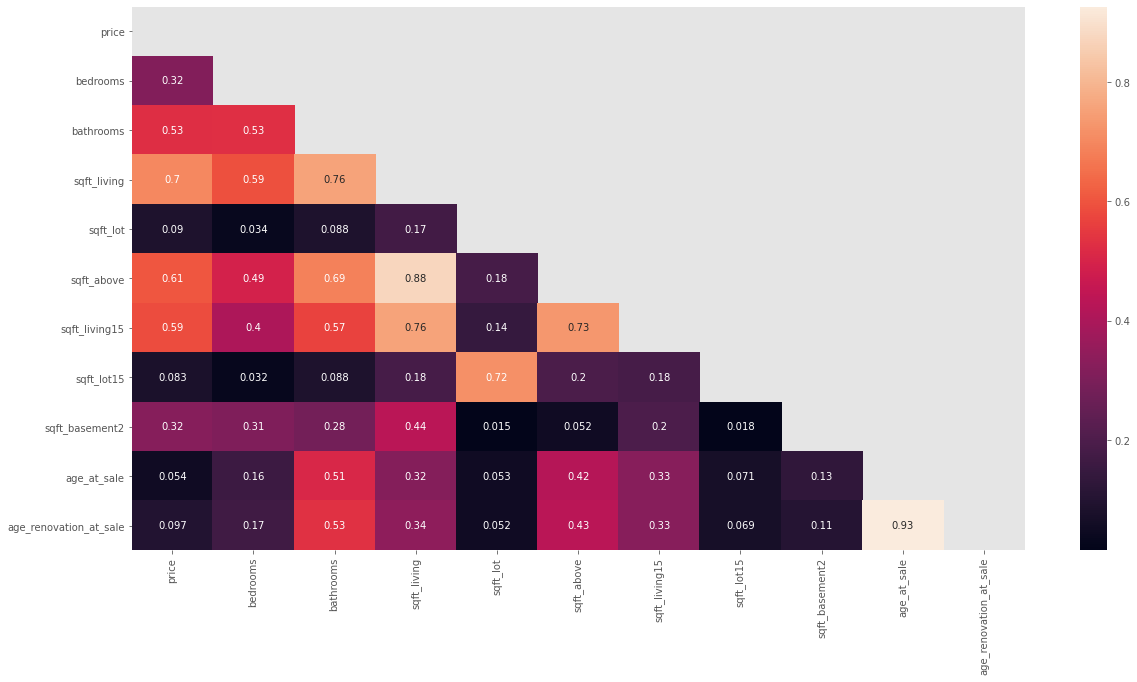

In [44]:
#Explore the co-linearity of x variables
mask = np.triu(np.ones_like(df_numeric.corr(), dtype=bool))

plt.figure(figsize=(20,10))

cor = df_numeric.corr().abs()
sns.heatmap(cor, mask=mask, annot=True);

Variable relationships with > .70 correlation, we will include just the columns from these combinations that have the stronger correlation with Price
- sqft_above - sqft_living (drop `'sqft_above'`)
- bathrooms - sqft_living (drop `'bathrooms'`)
- sqft_living - sqft_living15 (possible collinearity issues, but sqft_living15 captures some of the effects of the neighborhood)
- sqft_lot - sqft_lot15 (drop `'sqft_lot15'`)


In [45]:
df_numeric.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'sqft_above', 'sqft_living15', 'sqft_lot15', 'sqft_basement2',
       'age_at_sale', 'age_renovation_at_sale'],
      dtype='object')

In [50]:
#Create a df containing our numeric columns with co-linear columns dropped
columns_to_drop = ['sqft_above','bathrooms','sqft_lot15', 'sqft_basement2', 'age_renovation_at_sale']
df_numeric_2 = df_numeric.drop(columns=columns_to_drop)

In [51]:
df_numeric_2

,price,bedrooms,sqft_living,sqft_lot,sqft_living15,age_at_sale
0,221900.0,3,1180,5650,1340,59
1,538000.0,3,2570,7242,1690,63
2,180000.0,2,770,10000,2720,82
3,604000.0,4,1960,5000,1360,49
4,510000.0,3,1680,8080,1800,28
...,...,...,...,...,...,...
21592,360000.0,3,1530,1131,1530,5
21593,400000.0,4,2310,5813,1830,1
21594,402101.0,2,1020,1350,1020,5
21595,400000.0,3,1600,2388,1410,11


In [52]:
X_train_numeric_2 = X_train_numeric.drop(columns=columns_to_drop)
X_test_numeric_2 = X_test_numeric.drop(columns=columns_to_drop)
multi_model_2 = LinearRegression()
multi_model_2.fit(X_train_numeric_2,y_train)

LinearRegression()

In [53]:
#Print results compared to our previous models
print(f'Simple R2 {round(simple_model.rsquared,4)}')
print(f'multi_model_1 Train R2 {round(lr.score(X_train_numeric, y_train),4)}')
print(f'multi_model_1 Test R2 {round(lr.score(X_test_numeric, y_test),4)}')
print(f'multi_model_2 Train R2 {round(multi_model_2.score(X_train_numeric_2, y_train),4)}')
print(f'multi_model_2 Test R2 {round(multi_model_2.score(X_test_numeric_2, y_test),4)}')

Simple R2 0.4927
multi_model_1 Train R2 0.5704
multi_model_1 Test R2 0.5559
multi_model_2 Train R2 0.556
multi_model_2 Test R2 0.5444


## Dummying for Categorical Variable 'Condition'

In [54]:
df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [55]:
#our current model containing only numeric columns
X_train_numeric_2

,bedrooms,sqft_living,sqft_lot,sqft_living15,age_at_sale
6243,4,1440,4855,1300,42
8986,3,1430,9857,1310,35
9419,4,3120,5000,3200,4
10155,4,2060,6958,1760,41
10436,3,2500,4080,1550,92
...,...,...,...,...,...
11964,3,2230,5800,2230,10
21575,4,2770,3852,1810,0
5390,4,1530,9000,1520,38
860,1,380,15000,1170,51


In [64]:
columns_numeric = list(X_train_numeric_2.columns)
columns_numeric

['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_living15', 'age_at_sale']

In [66]:
columns_numeric_dummy = columns_numeric
columns_numeric_dummy.append('condition')
columns_numeric_dummy

['bedrooms',
 'sqft_living',
 'sqft_lot',
 'sqft_living15',
 'age_at_sale',
 'condition']

In [67]:
X_train_condition, X_test_condition = X_train[columns_numeric_dummy], X_test[columns_numeric_dummy]

In [68]:
X_train_condition

,bedrooms,sqft_living,sqft_lot,sqft_living15,age_at_sale,condition
6243,4,1440,4855,1300,42,Good
8986,3,1430,9857,1310,35,Good
9419,4,3120,5000,3200,4,Average
10155,4,2060,6958,1760,41,Average
10436,3,2500,4080,1550,92,Very Good
...,...,...,...,...,...,...
11964,3,2230,5800,2230,10,Average
21575,4,2770,3852,1810,0,Average
5390,4,1530,9000,1520,38,Good
860,1,380,15000,1170,51,Average


In [69]:
X_test_condition

,bedrooms,sqft_living,sqft_lot,sqft_living15,age_at_sale,condition
3686,3,850,8573,850,70,Average
10247,3,1510,6083,1510,74,Good
4037,4,1790,42000,2060,32,Average
3437,2,1140,2500,1500,27,Average
19291,3,1500,3920,1640,67,Average
...,...,...,...,...,...,...
2522,2,1020,5130,1200,66,Good
11119,3,2050,8172,2140,13,Average
11973,5,2120,137565,2120,101,Average
17601,3,1990,7577,1900,25,Average


In [70]:
#create dummy variables for the "condition" column
condition_dummies = pd.get_dummies(X_train_condition['condition'], drop_first=True)
condition_dummies
#drops 'Average', creates 4 additional columns

,Fair,Good,Poor,Very Good
6243,0,1,0,0
8986,0,1,0,0
9419,0,0,0,0
10155,0,0,0,0
10436,0,0,0,1
...,...,...,...,...
11964,0,0,0,0
21575,0,0,0,0
5390,0,1,0,0
860,0,0,0,0


In [71]:
X_train_dummies = pd.concat([X_train_condition, condition_dummies], axis=1)
X_train_dummies

,bedrooms,sqft_living,sqft_lot,sqft_living15,age_at_sale,condition,Fair,Good,Poor,Very Good
6243,4,1440,4855,1300,42,Good,0,1,0,0
8986,3,1430,9857,1310,35,Good,0,1,0,0
9419,4,3120,5000,3200,4,Average,0,0,0,0
10155,4,2060,6958,1760,41,Average,0,0,0,0
10436,3,2500,4080,1550,92,Very Good,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
11964,3,2230,5800,2230,10,Average,0,0,0,0
21575,4,2770,3852,1810,0,Average,0,0,0,0
5390,4,1530,9000,1520,38,Good,0,1,0,0
860,1,380,15000,1170,51,Average,0,0,0,0


In [76]:
#creating dummy columns for X_test_condition
test_dummies = pd.get_dummies(X_test_condition['condition'], drop_first=True)
test_dummies

,Fair,Good,Poor,Very Good
3686,0,0,0,0
10247,0,1,0,0
4037,0,0,0,0
3437,0,0,0,0
19291,0,0,0,0
...,...,...,...,...
2522,0,1,0,0
11119,0,0,0,0
11973,0,0,0,0
17601,0,0,0,0


In [73]:
#adding dummy columns to X_test df
X_test_dummies = pd.concat([X_test_condition, test_dummies], axis=1)
X_test_dummies

,bedrooms,sqft_living,sqft_lot,sqft_living15,age_at_sale,condition,Fair,Good,Poor,Very Good
3686,3,850,8573,850,70,Average,0,0,0,0
10247,3,1510,6083,1510,74,Good,0,1,0,0
4037,4,1790,42000,2060,32,Average,0,0,0,0
3437,2,1140,2500,1500,27,Average,0,0,0,0
19291,3,1500,3920,1640,67,Average,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2522,2,1020,5130,1200,66,Good,0,1,0,0
11119,3,2050,8172,2140,13,Average,0,0,0,0
11973,5,2120,137565,2120,101,Average,0,0,0,0
17601,3,1990,7577,1900,25,Average,0,0,0,0


In [74]:
X_train_dummies.drop(columns=["condition"], inplace=True)
X_train_dummies

,bedrooms,sqft_living,sqft_lot,sqft_living15,age_at_sale,Fair,Good,Poor,Very Good
6243,4,1440,4855,1300,42,0,1,0,0
8986,3,1430,9857,1310,35,0,1,0,0
9419,4,3120,5000,3200,4,0,0,0,0
10155,4,2060,6958,1760,41,0,0,0,0
10436,3,2500,4080,1550,92,0,0,0,1
...,...,...,...,...,...,...,...,...,...
11964,3,2230,5800,2230,10,0,0,0,0
21575,4,2770,3852,1810,0,0,0,0,0
5390,4,1530,9000,1520,38,0,1,0,0
860,1,380,15000,1170,51,0,0,0,0


In [75]:
X_test_dummies.drop(columns=["condition"], inplace=True)
X_test_dummies

,bedrooms,sqft_living,sqft_lot,sqft_living15,age_at_sale,Fair,Good,Poor,Very Good
3686,3,850,8573,850,70,0,0,0,0
10247,3,1510,6083,1510,74,0,1,0,0
4037,4,1790,42000,2060,32,0,0,0,0
3437,2,1140,2500,1500,27,0,0,0,0
19291,3,1500,3920,1640,67,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2522,2,1020,5130,1200,66,0,1,0,0
11119,3,2050,8172,2140,13,0,0,0,0
11973,5,2120,137565,2120,101,0,0,0,0
17601,3,1990,7577,1900,25,0,0,0,0


In [77]:
multi_model_3 = LinearRegression()
multi_model_3.fit(X_train_dummies,y_train)

LinearRegression()

In [78]:
#Print results compared to our previous models
print(f'Simple R2 {round(simple_model.rsquared,2)}')
print(f'multi_model_1 Train R2 {round(lr.score(X_train_numeric, y_train),4)}')
print(f'multi_model_1 Test R2 {round(lr.score(X_test_numeric, y_test),4)}')
print(f'multi_model_2 Train R2 {round(multi_model_2.score(X_train_numeric_2, y_train),4)}')
print(f'multi_model_2 Test R2 {round(multi_model_2.score(X_test_numeric_2, y_test),4)}')
print(f'multi_model_3 Train R2 {round(multi_model_3.score(X_train_dummies, y_train),4)}')
print(f'multi_model_3 Test R2 {round(multi_model_3.score(X_test_dummies, y_test),4)}')

Simple R2 0.49
multi_model_1 Train R2 0.5704
multi_model_1 Test R2 0.5559
multi_model_2 Train R2 0.556
multi_model_2 Test R2 0.5444
multi_model_3 Train R2 0.5577
multi_model_3 Test R2 0.5446


In [80]:
#OLS for multi_model_3
endog = y_train
exog = sm.add_constant(X_train_dummies)

multi_model_3 = sm.OLS(endog, exog).fit()
multi_model_3 = multi_model_3.summary()
multi_model_3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     2419.
Date:                Wed, 22 Jun 2022   Prob (F-statistic):               0.00
Time:                        09:41:29   Log-Likelihood:            -2.3893e+05
No. Observations:               17277   AIC:                         4.779e+05
Df Residuals:                   17267   BIC:                         4.780e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.445e+05   9462.109    -15.274      0.000   -1.63e+05   -1.26e+05
bedrooms      -6.515e+04   2587.001    -25.184      0.000   -7.02e+04   -6.01e+04
sqft_living     300.0448      3.623     82.814      0.000     292.943     307.146
sqft_lot         -0.4765      0.047    -10.037      0.000      -0.570      -0.383
sqft_living15    87.4874      4.261     20.533      0.000      79.136      95.839
age_at_sale    2579.8514     73.642     35.033      0.000    2435.506    2724.196
Fair          -5.514e+04   2.13e+04     -2.588      0.010   -9.69e+04   -1.34e+04
Good          -4218.1976   4581.104     -0.921      0.357   -1.32e+04    4761.230
Poor          -1.442e+05   5.65e+04     -2.554      0.011   -2.55e+05   -3.35e+04
Very Good      4.903e+04   7396.962      6.628      0.000    3.45e+04    6.35e+04
==============================================================================
Omnibus:                    11654.358   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           429251.741
Skew:                           2.748   Prob(JB):                         0.00
Kurtosis:                      26.793   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

p-value measuring whether good is statistically significant vs the baseline of average